In [1]:
import pandas as pd

In [2]:
#open files
hannibal =  pd.read_csv('hannibal/Archive/hannibal.csv', sep=',')

In [5]:
#checking for duplicates
hannibal.duplicated().sum()

0

In [4]:
#drop duplicates with the same story link
hannibal = hannibal.drop_duplicates(subset=['Storylink'])

In [6]:
#re-indexing after dropping
hannibal = hannibal.reset_index(drop=True)

In [7]:
#change postdate to date format
hannibal['Postdate'] = pd.to_datetime(hannibal['Postdate'])

**PLOT NUM Of STORIES BY YEAR**

<AxesSubplot:xlabel='Postdate'>

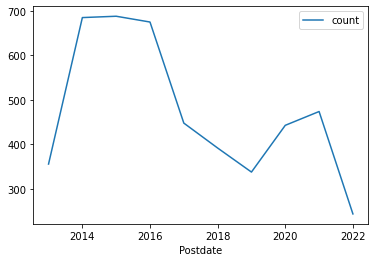

In [14]:
hannibal['Title'].groupby([hannibal['Postdate'].dt.year]).agg({'count'}).plot()

In [15]:
#counting number of tags per fanfic
hannibal['Tags_Count'] = hannibal['Tags'].apply(lambda x: x.count('|')+1)

**average number of tags per story**

In [16]:
hannibal['Tags_Count'].mean()

6.371494834492937

In [17]:
hannibal.groupby([hannibal['Postdate'].dt.year])['Tags_Count'].mean()

Postdate
2013    4.334270
2014    4.410219
2015    4.783430
2016    5.546667
2017    6.482143
2018    6.859694
2019    8.103550
2020    8.069977
2021    9.208861
2022    9.627049
Name: Tags_Count, dtype: float64

<AxesSubplot:xlabel='Postdate'>

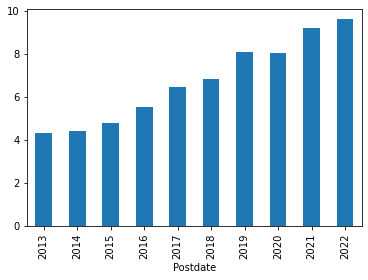

In [18]:
hannibal.groupby([hannibal['Postdate'].dt.year])['Tags_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

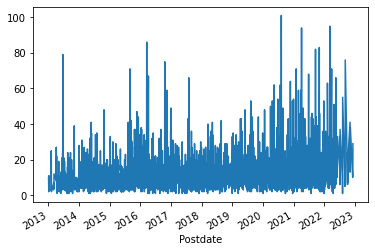

In [26]:
hannibal.groupby('Postdate')['Tags_Count'].sum().plot()

**NUMBER OF FANDOMS**

In [20]:
#counting number of fandoms per fanfic
hannibal['Fandom_Count'] = hannibal['Fandom'].apply(lambda x: x.count(',')+1)

In [21]:
hannibal['Fandom_Count'].mean()

1.5053763440860215

<AxesSubplot:xlabel='Postdate'>

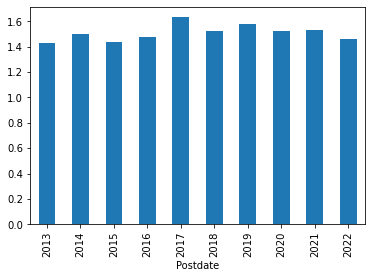

In [22]:
hannibal.groupby([hannibal['Postdate'].dt.year])['Fandom_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

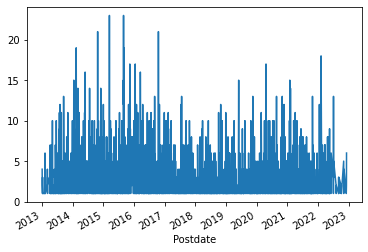

In [25]:
hannibal.groupby('Postdate')['Fandom_Count'].sum().plot()

**NUMBER OF CHARACTERS AND PAIRINGS**

In [27]:
hannibal['Charships'] = hannibal['Charships'].astype('str')

In [28]:
hannibal['Char_Count'] = hannibal['Charships'].apply(lambda x: x.count(',')+1)

In [29]:
hannibal['Char_Count'].mean()

3.1703563145688385

<AxesSubplot:xlabel='Postdate'>

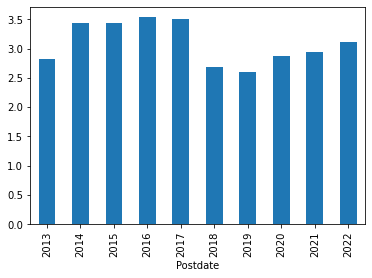

In [30]:
hannibal.groupby([hannibal['Postdate'].dt.year])['Char_Count'].mean().plot.bar()

<AxesSubplot:xlabel='Postdate'>

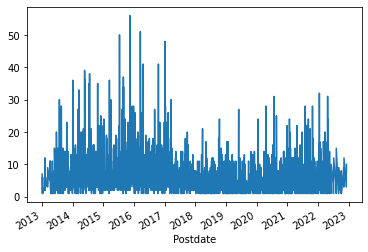

In [31]:
hannibal.groupby('Postdate')['Char_Count'].sum().plot()